In [6]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def target_pdf(x):
    return stats.norm(-4,0.5).pdf(x) + stats.norm(4,1).pdf(x)

In [30]:
def metropolis(current=.5, width=.5, iterations=1000):
    current_sample = current  
    samples = np.zeros(iterations)  
    is_accepted = np.zeros(iterations)
    
    for i in range(iterations):
        proposal_mu = stats.norm.rvs(current_sample, width)
        accept_proposal_prob = target_pdf(proposal_mu) / target_pdf(current_sample)
        
        if np.random.rand() < accept_proposal_prob:
            current_sample = proposal_mu
            is_accepted[i] = 1
        
        samples[i] = current_sample
    return samples, is_accepted
    

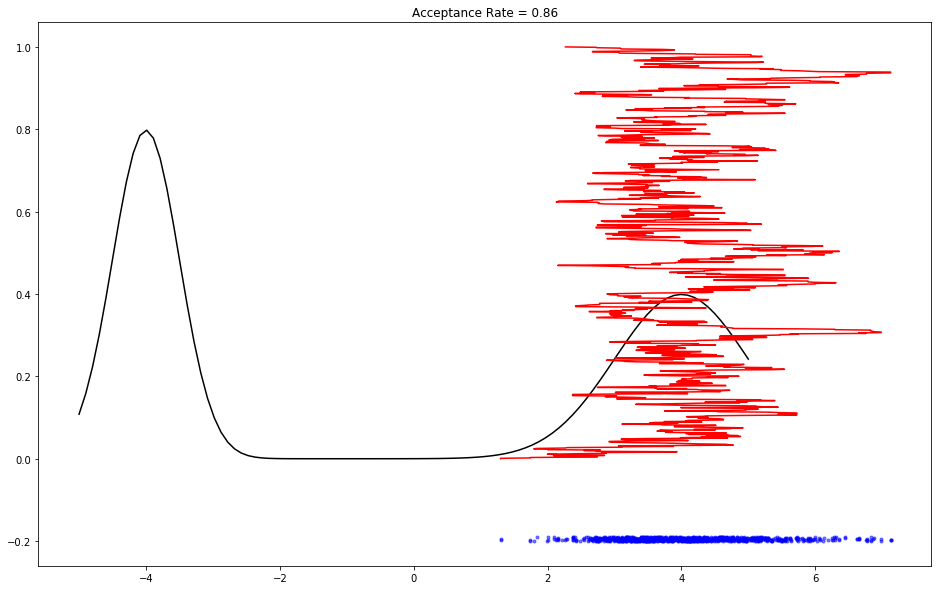

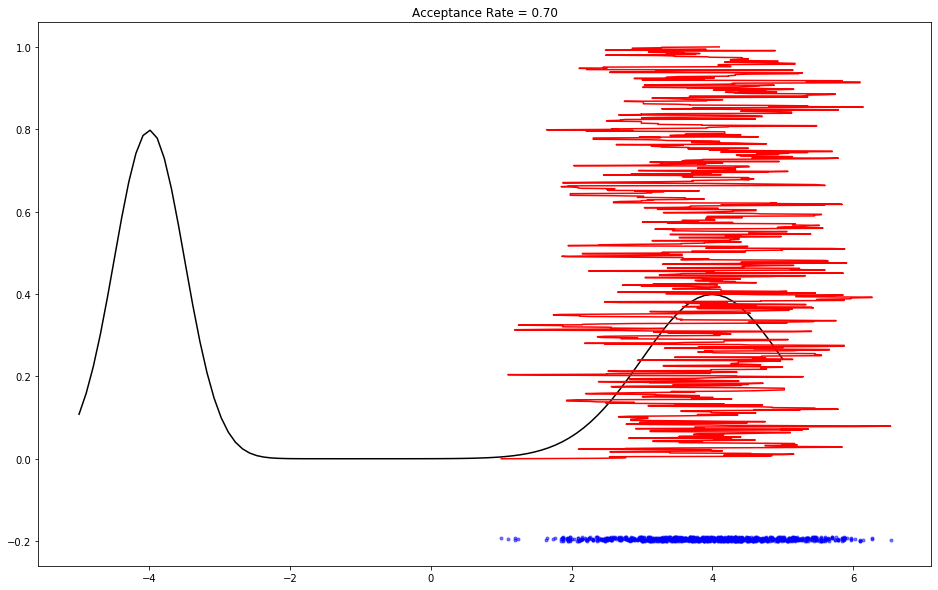

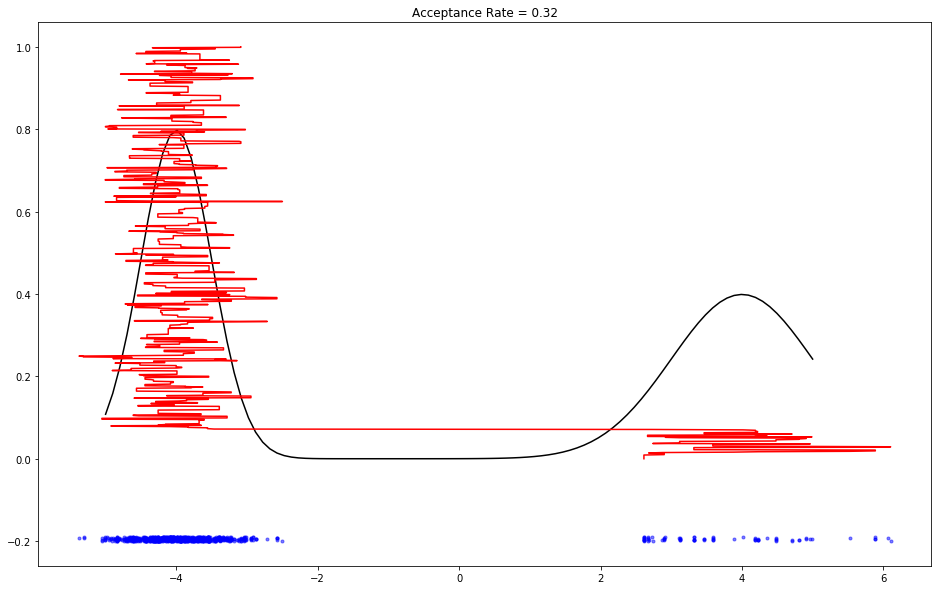

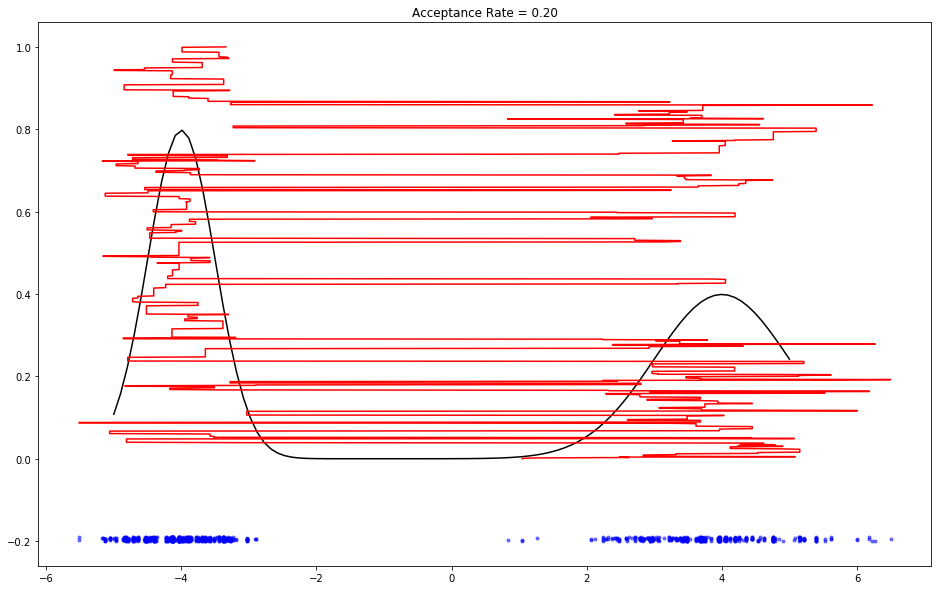

In [32]:
epsilon = [0.5,1,2,4]
x = np.linspace(-5,5,100)

for width in epsilon:
    samples, is_accepted = metropolis(current=1, width=width, iterations=1000)
    plt.figure(figsize = (16,10))
    plt.plot(x, target_pdf(x), 'black')
    plt.plot(samples, stats.uniform.rvs(loc=-0.2, scale=0.01, size=len(samples)),'.', alpha=0.5, color = 'blue')
    plt.plot(samples, np.linspace(0,1,len(samples)), color="red")
    plt.title("Acceptance Rate = {:.2f}".format(np.mean(is_accepted)))
